### HVAC: Room Occupancy Detection

In [54]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [5]:
#loading the data into dataframes
df_train = pd.read_csv("datatraining.txt")
df_val = pd.read_csv("datatest.txt")
df_test = pd.read_csv("datatest2.txt")

In [9]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
print(df_val.info())
df_val.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [11]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


All three dfs have the same number of columns and variables.

In [17]:
#dropping the date column and re-setting the index
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [18]:
#exploring the training set
df_train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [19]:
df_train.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

As seen above, the ranges for the different features greatly vary, thus feature scaling or data normalization is needed.

In [24]:
scaler = MinMaxScaler()
cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(df_train[cols]))
df_val[cols] = scaler.transform(np.array(df_val[cols]))
df_test[cols] = scaler.transform(np.array(df_test[cols]))
df_train[cols] = scaler.transform(np.array(df_train[cols]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


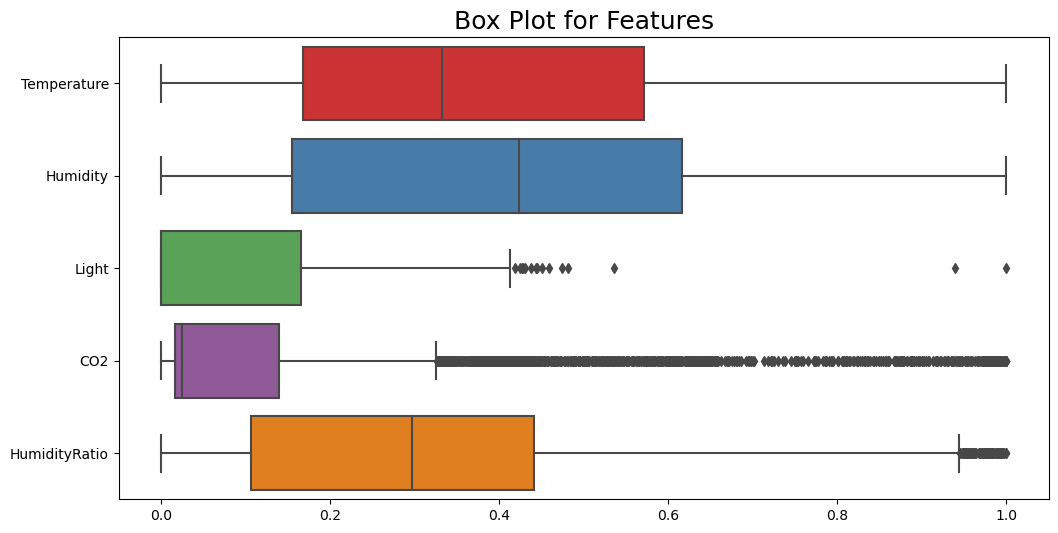

In [33]:
plt.figure(figsize=(12,6))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=df_train.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set1")
print(df_train.drop(['date', 'Occupancy'],axis=1).describe())

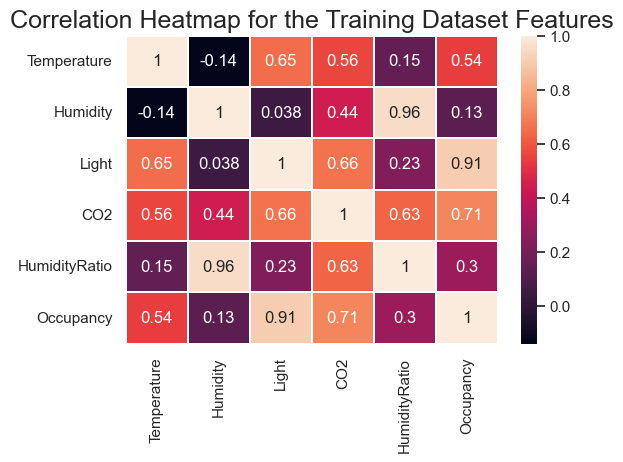

In [68]:
plt.figure(figsize=(6,4))
plt.title('Correlation Heatmap for the Training Dataset Features', fontdict={'fontsize':18})
ax = sns.heatmap(df_train.corr(), annot=True, linewidths=.2)

In [36]:
#Based on the plot above, light is highly correlated with Occupancy.

0    6414
1    1729
Name: Occupancy, dtype: int64


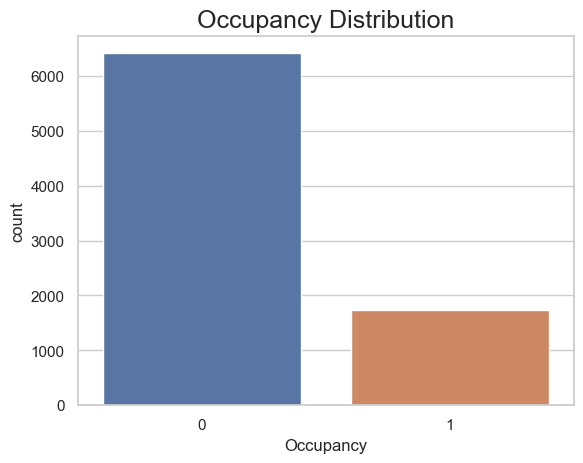

In [43]:
sns.set(style="whitegrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=df_train)
print(df_train['Occupancy'].value_counts())

In [48]:
#based on the plot above, our data is imbalanced. To balance our data we will upsample the minority class.

#creating two different dfs of the majority and minority class
df_majority = df_train[(df_train['Occupancy']==0)]
df_minority = df_train[(df_train['Occupancy']==1)]

#upsample the minority class
df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=6414,
                                random_state=42)

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    6414
0    6414
Name: Occupancy, dtype: int64


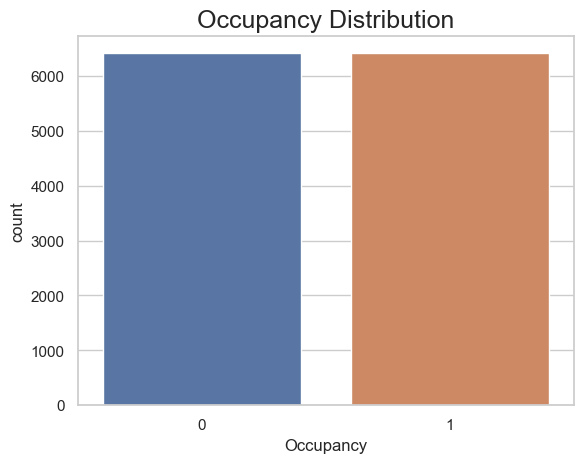

In [50]:
sns.set(style="whitegrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=df_upsampled)
print(df_upsampled['Occupancy'].value_counts())

### Generating the classification Models

In [52]:
X_train = df_upsampled.drop(columns=['date', 'Occupancy'], axis =1)
y_train = df_upsampled['Occupancy']
X_val = df_val.drop(columns=['date', 'Occupancy'], axis =1)
y_val = df_val['Occupancy']
X_test = df_test.drop(columns=['date', 'Occupancy'], axis =1)
y_test = df_test['Occupancy']

#### K-Nearest Neighbors (KNN)

In [56]:
# parameter-tuning for knn
n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_val, y_val)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [57]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

Accuracy for KNN on validation data: 96.4%


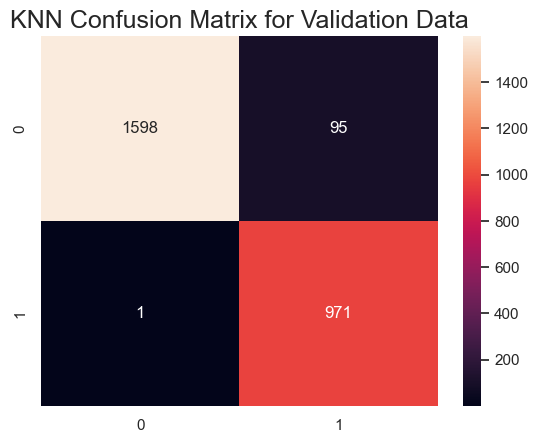

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_val)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d")
print("Accuracy for KNN on validation data: {}%".format(round((knn_model.score
                                                               (X_val, y_val)*100),2)))

Accuracy for KNN on test data: 90.14%


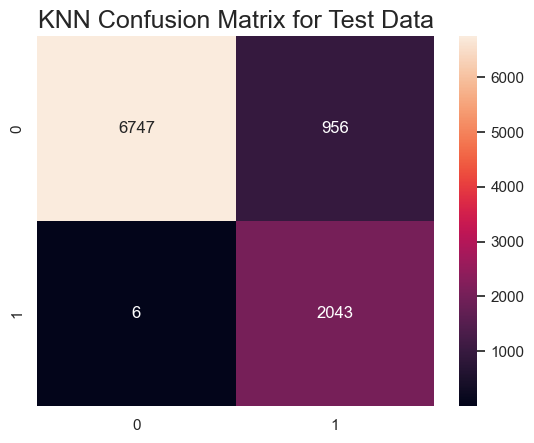

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
plt.title("KNN Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
print("Accuracy for KNN on test data: {}%".format(round((knn_model.score
                                                               (X_test, y_test)*100),2)))

In [72]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

Accuracy for SVM on validation data: 97.49%


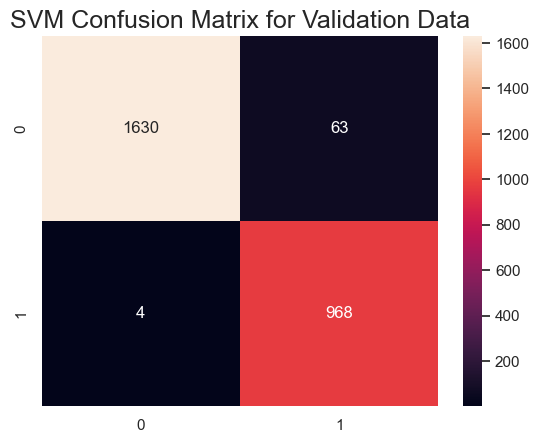

In [73]:
y_pred = svm_model.predict(X_val)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d")
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score
                                                               (X_val, y_val)*100),2)))

In [75]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

Accuracy for SVM on test data: 95.85%


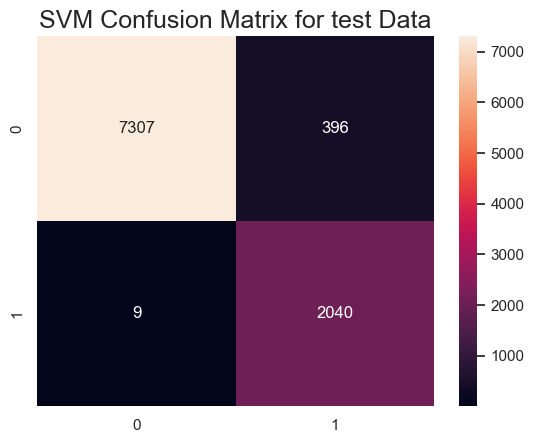

In [74]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
print("Accuracy for SVM on test data: {}%".format(round((svm_model.score
                                                               (X_test, y_test)*100),2)))